In [46]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
import networkx as nx
import pandas as pd
import markov_clustering as mc
import community
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import utils as ut

In [ ]:
import pickle
import networkx as nx
import pandas as pd
import markov_clustering as mc
import community
import numpy as np
from scipy.stats import hypergeom

def read_graph(file):
    
    with open("../part_1/results/lcc/" + file + "_lcc.pickle","rb") as f:
        return pickle.load(f)


def mcl(graph):
    
    mat = nx.to_numpy_matrix(graph)
    
    mod = -1
    
    for val in np.arange(1.2,3,0.1):
        
        res = mc.run_mcl(mat, inflation=val)
        clust = mc.get_clusters(res)
        q = mc.modularity(matrix=np.asmatrix(res), clusters=clust)
        if q > mod:
            clusters = clust
    
    labels = dict(zip(range(len(graph)),graph.nodes()))
    
    return [[labels.get(item) for item in clust] for clust in clusters]


def louvain(G_lcc):
    
    partition = community.best_partition(G_lcc)
    return [[nodes for nodes in partition.keys() if partition[nodes] == com] for com in set(partition.values())]


def check_length_mod(mod):
    if len(mod) >= 10:
        return True

def hypergeom_test(graph, mod):
    
    # Initialize the gene list
    with open("../../HW1/seed_genes.txt","r") as f:
        genes = [gene.rstrip() for gene in f.readlines()]
    
    M = len(graph.nodes())
    n = len(set(genes).intersection(set(graph.nodes())))
    N = len(mod)
    x = len(set(genes).intersection(set(mod)))
    
    pval = hypergeom.sf(x-1, M, n, N)
    
    return [x, N, set(genes).intersection(set(mod)), set(mod).difference(set(genes)), pval]


    
def create_table(file, lou_mod, mcl_mod):
    
    lou_mod = [["Louvain"]+elem for elem in lou_mod]
    mcl_mod = [["MCL"]+elem for elem in mcl_mod]
    
    mods = lou_mod + mcl_mod
    
    cols = ["Clustering Algorithm", "Number of Seed Genes", "Number of Genes", "List of Seed Genes", "List of Non-Seed Genes", "P-Value"]
    
    table = pd.DataFrame(data = mods, columns = cols)
    table["Id"] = np.arange(1, table.shape[0]+1)
    
    table.to_excel("results/"+file+".xlsx")
    
    
    put_mod = table[table["P-Value"] < 0.05]
    
    if not put_mod.empty:
        
        for index, row in put_mod.iterrows():
            with open("../part_3/putative_disease_modules/"+file+"_"+str(row["Id"])+".txt", "w") as f:
                f.writelines("%s\n" % l for l in list(row["List of Seed Genes"].union(row["List of Non-Seed Genes"])))
                f.close()
    
    return table






############### Reference

# https://blog.alexlenail.me/understanding-and-implementing-the-hypergeometric-test-in-python-a7db688a7458



In [3]:
### read data

ii = ut.read_graph("ii")
ui = ut.read_graph("ui")


### Hypergeom Test

ii_lou = map(lambda x : ut.hypergeom_test(ii,x) ,filter(ut.check_length_mod, ut.louvain(ii, 'ii')))
ii_mcl = map(lambda x : ut.hypergeom_test(ii,x) ,filter(ut.check_length_mod, ut.mcl(ii)))


ui_lou = map(lambda x : ut.hypergeom_test(ui,x) ,filter(ut.check_length_mod, ut.louvain(ui, 'ui')))
ui_mcl = map(lambda x : ut.hypergeom_test(ui,x) ,filter(ut.check_length_mod, ut.mcl(ui)))


# Create tables

#ii_mod = ut.create_table("ii_mod", list(ii_lou), list(ii_mcl))
#ui_mod = ut.create_table("ui_mod", list(ui_lou), list(ui_mcl))


# Visualize clusters 

ut.louvain(ii, 'ii', viz=True)
ut.louvain(ui, 'ui', viz=True)



In [18]:
def mcl(graph, viz=False):
    
    mat = nx.to_numpy_matrix(graph)
    
    mod = -1
    
    for val in np.arange(1.2,3,0.1):
        
        res = mc.run_mcl(mat, inflation=val)
        clust = mc.get_clusters(res)
        q = mc.modularity(matrix=np.asmatrix(res), clusters=clust)
        if q > mod:
            clusters = clust
    
    if viz == False:
        
        labels = dict(zip(range(len(graph)),graph.nodes()))

        return[[labels.get(item) for item in clust] for clust in clusters]
    
    else:
        
        plt.figure(num=None, figsize=(20,20), dpi=50)
        pos = nx.spring_layout(graph)
        mc.draw_graph(mat, clusters, node_size=200, with_labels=False, edge_color="silver")
        #plt.savefig('results/' + filename + '.png')

        
        
        

import seaborn as sns

def louvain(G_lcc, filename, viz=False):
    
    partition = community.best_partition(G_lcc)
    clusters = [[nodes for nodes in partition.keys() if partition[nodes] == com] for com in set(partition.values())]
    
    if viz == False:
    
        return(clusters)
    
    else:
        
        plt.figure(num=None, figsize=(20,20), dpi=50)
        pos = nx.spring_layout(G_lcc)
        col = sns.color_palette("husl", len(clusters))
        
        for idx,c in enumerate(clusters):
            nx.draw_networkx_nodes(G_lcc, pos, nodelist=clusters[idx], node_color=col[idx])
            
        nx.draw_networkx_edges(G_lcc, pos, alpha=0.5)
        plt.savefig('results/' + filename + '_louvain.png', bbox_inches='tight')


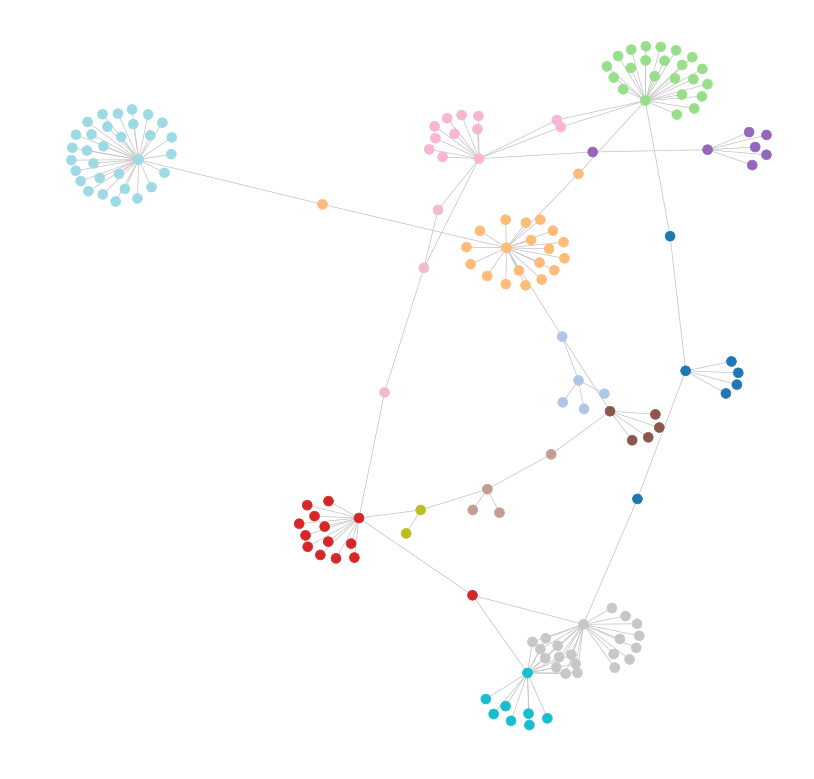

In [19]:
mcl(ui, viz=True)

In [ ]:
size = float(len(set(partition_ii.values())))
pos = nx.spring_layout(G_ii)
count = 0.
for com in set(partition_ii.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_ii.keys()
                                if partition_ii[nodes] == com]
    nx.draw_networkx_nodes(G_ii, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G_ii, pos, alpha=0.5)
plt.show()

    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, nodelist= list(d.keys()), node_size=[v*100  for v in d.values()], with_labels = True, 
            pos = get_coordinates(),  font_size=18, node_color=list(nx.get_node_attributes(G,'color').values()))
    plt.savefig('results/' + filename + '_degree' + '.png')

In [ ]:
size = float(len(set(partition_ii.values())))
pos = nx.spring_layout(G_ii)
count = 0.
for com in set(partition_ii.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_ii.keys()
                                if partition_ii[nodes] == com]
    nx.draw_networkx_nodes(G_ii, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G_ii, pos, alpha=0.5)
plt.show()

    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G, nodelist= list(d.keys()), node_size=[v*100  for v in d.values()], with_labels = True, 
            pos = get_coordinates(),  font_size=18, node_color=list(nx.get_node_attributes(G,'color').values()))
    plt.savefig('results/' + filename + '_degree' + '.png')

In [ ]:
mc.draw_graph(ui_mat, clusters, node_size=50, with_labels=False, edge_color="silver")

In [ ]:
# https://github.com/GuyAllard/markov_clustering

# https://blog.alexlenail.me/understanding-and-implementing-the-hypergeometric-test-in-python-a7db688a7458

# https://www.biostars.org/p/66729/

# 